In [1]:
from datetime import date, datetime
from BorderModel import BorderImpute, smooth
from sklearn.ensemble import ExtraTreesRegressor
from dbhelper import pd_query
import matplotlib.pyplot as plt
import random
from sklearn.metrics import r2_score
import pandas as pd
from scipy.stats import ttest_ind
%matplotlib inline

In [2]:
def run_impute(threshold, window, source_df, target_df):
    imputer = BorderImpute(threshold=threshold, window=window, progressbar=False)

    dfsource = imputer.prepare_source(source_df)
    model = ExtraTreesRegressor(n_jobs=-1, n_estimators=96, bootstrap=True, oob_score=True)
    imputer.build_model(model)

    imputer.prepare_target(target_df)
    imputer.predict()
    
    return imputer

def plot_imputed(imputer, target_df, start, end):
    plt.figure(figsize=(18,4))
    target_df = target_df.set_index('date')
    plt.plot(target_df[start:end].waittime, label='actual')
    plt.plot(imputer.predictdf[start:end].waittime, label='predict')
    plt.legend();
    
def plot_hist(series):
    plt.figure(figsize=(16,4))
    plt.subplot(121)
    plt.xlim([0,50])
    plt.hist(series, bins=100)
    plt.subplot(122)
    plt.hist(series, bins=50);

## Peace Arch North

In [28]:
# Get source data with neighbor features
source_query = '''
               select 
                   c.date,
                   year,
                   month,
                   dayofweek,
                   minofday,
                   metric as volume,
                   waittime
               from crossingdata c
               join datefeatures d
                   on d.date = c.date
               join mungedata m 
                   on m.date = c.date
                   and m.crossing_id = c.crossing_id
                   and munger_id = 3
                   and is_waittime = false
                   and metric is not null
               where
                   c.crossing_id=2
                   and valid = 1
                   and waittime is not null
                order by c.date;
               '''
source_df = pd_query(source_query)

target_query = '''
               select 
                   c.date,
                   year,
                   month,
                   dayofweek,
                   minofday,
                   metric as volume,
                   waittime
               from crossingdata c
               join datefeatures d
                   on d.date = c.date
               join mungedata m 
                   on m.date = c.date
                   and m.crossing_id = c.crossing_id
                   and munger_id = 3
                   and is_waittime = false
                   and metric is not null
               where
                   c.crossing_id=2
                   and valid = 1
                   and waittime is not null
                order by c.date;
               '''

target_df = pd_query(target_query)

In [30]:
imp = run_impute(16, 48, source_df, target_df)

105082
40294
27654
23259
19717
16831
14453
12600
11344
10192
9103
8219
7630
7054
6487
6137
5943
5751
5559
5400
5304
5208
5112
5016
4920
4824
4728
4632
4536
4440
4344
4248
4152
4056
3960
3864
3768
3672
3576
3480
3384
3288
3192
3096
3000
2904
2808
2712
2616
2520
2424
2328
2232
2136
2040
1944
1848
1752
1656
1560
1464
1368
1272
1176
1080
984
888
792
696
600
504
408
312
216
120
24
0


In [34]:
imp48 = imp

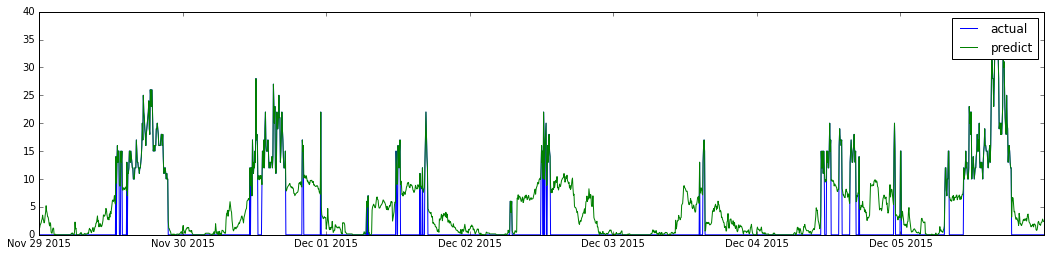

In [35]:
plot_imputed(imp48, target_df, '2015-11-29', '2015-12-5')

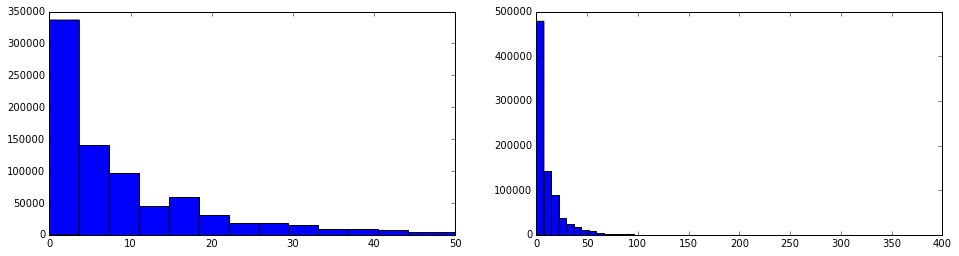

In [39]:
plot_hist(imp48.predictdf.waittime)

In [40]:
imp24 = run_impute(16, 24, source_df, target_df)

221218
105082
59364
40294
31507
27654
25216
23259
21409
19717
18233
16831
15572
14453
13459
12600
11920
11344
10768
10192
9631
9103
8620
8219
7918
7630
7342
7054
6766
6487
6281
6137
6039
5943
5847
5751
5655
5559
5463
5400
5352
5304
5256
5208
5160
5112
5064
5016
4968
4920
4872
4824
4776
4728
4680
4632
4584
4536
4488
4440
4392
4344
4296
4248
4200
4152
4104
4056
4008
3960
3912
3864
3816
3768
3720
3672
3624
3576
3528
3480
3432
3384
3336
3288
3240
3192
3144
3096
3048
3000
2952
2904
2856
2808
2760
2712
2664
2616
2568
2520
2472
2424
2376
2328
2280
2232
2184
2136
2088
2040
1992
1944
1896
1848
1800
1752
1704
1656
1608
1560
1512
1464
1416
1368
1320
1272
1224
1176
1128
1080
1032
984
936
888
840
792
744
696
648
600
552
504
456
408
360
312
264
216
168
120
72
24
0


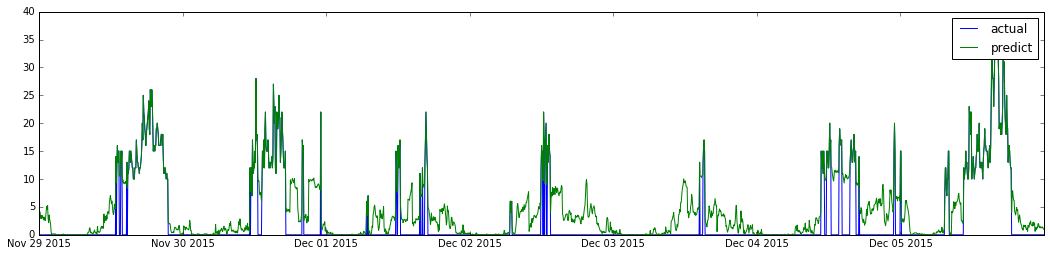

In [41]:
plot_imputed(imp24, target_df, '2015-11-29', '2015-12-5')

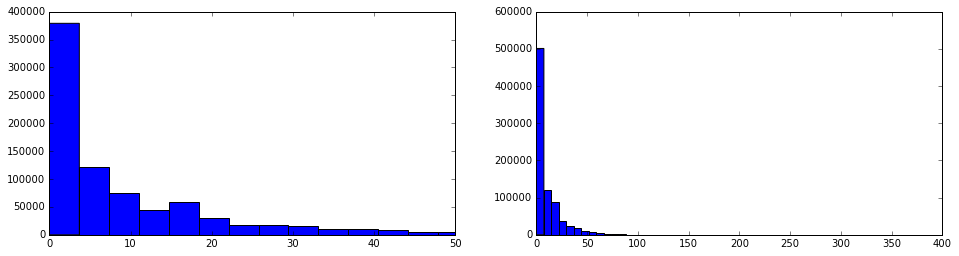

In [43]:
plot_hist(imp24.predictdf.waittime)

## Windows of 24 & 48 very similar, but 48 seems to be less erratic.

In [46]:
import os
from ipyparallel import Client
rc = Client()
dview = rc[:]

# set proper working directory on all clients
cwd = os.getcwd()
dview.map(os.chdir, [cwd] * 40)
# print(dview.apply_sync(os.getcwd))

with dview.sync_imports():
    from BorderModel import smooth

importing smooth from BorderModel on engine(s)


In [48]:
pr2 = rc[0].apply_async(smooth, 5, 2, 'waittime', path='/home/ubuntu/BorderCrossing/data/', df=imp48.predictdf)

## Run impute on Pacific Highway

In [3]:
# Get source data with neighbor features
source_query = '''
               select 
                   c.date,
                   year,
                   month,
                   dayofweek,
                   minofday,
                   metric as volume,
                   waittime
               from crossingdata c
               join datefeatures d
                   on d.date = c.date
               join mungedata m 
                   on m.date = c.date
                   and m.crossing_id = c.crossing_id
                   and munger_id = 3
                   and is_waittime = false
                   and metric is not null
               where
                   c.crossing_id=2
                   and valid = 1
                   and waittime is not null
                order by c.date;
               '''
source_df = pd_query(source_query)

target_query = '''
               select 
                   c.date,
                   year,
                   month,
                   dayofweek,
                   minofday,
                   metric as volume,
                   waittime
               from crossingdata c
               join datefeatures d
                   on d.date = c.date
               join mungedata m 
                   on m.date = c.date
                   and m.crossing_id = c.crossing_id
                   and munger_id = 3
                   and is_waittime = false
                   and metric is not null
               where
                   c.crossing_id=6
                   and valid = 1
                   and waittime is not null
                order by c.date;
               '''

target_df = pd_query(target_query)

In [4]:
imp6 = run_impute(5, 48, source_df, target_df)

17995
11252
9828
9087
8555
8166
7878
7590
7325
7133
6941
6749
6557
6365
6173
5981
5789
5597
5492
5396
5300
5204
5108
5012
4916
4820
4724
4628
4532
4436
4340
4244
4148
4052
3956
3860
3764
3668
3572
3476
3380
3284
3188
3092
2996
2900
2804
2708
2612
2516
2420
2324
2228
2132
2036
1940
1844
1748
1652
1556
1460
1364
1268
1172
1076
980
884
788
692
596
500
404
308
212
116
20
0


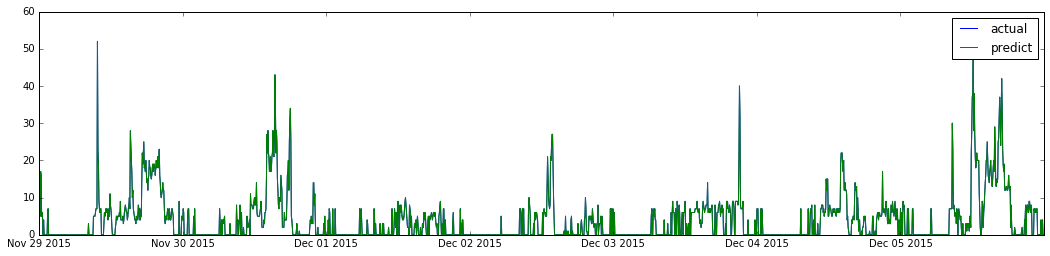

In [5]:
plot_imputed(imp6, target_df, '2015-11-29', '2015-12-5')

In [16]:
imp6.predictdf.tail()

,year,month,dayofweek,minofday,volume,waittime,lead,lag
date,,,,,,,,
2015-12-31 23:35:00,2015,12,3,1415,3.11646,7,0.833333,5.500850
2015-12-31 23:40:00,2015,12,3,1420,2.88015,0,1.639640,5.331633
2015-12-31 23:45:00,2015,12,3,1425,2.59601,0,3.047059,4.863095
2015-12-31 23:50:00,2015,12,3,1430,2.28786,0,7.000000,4.346939
2015-12-31 23:55:00,2015,12,3,1435,1.98485,7,NaN,4.114796


In [15]:
target_df.tail()

,date,year,month,dayofweek,minofday,volume,waittime
703127,2015-12-31 23:35:00,2015,12,3,1415,3.11646,7
703128,2015-12-31 23:40:00,2015,12,3,1420,2.88015,0
703129,2015-12-31 23:45:00,2015,12,3,1425,2.59601,0
703130,2015-12-31 23:50:00,2015,12,3,1430,2.28786,0
703131,2015-12-31 23:55:00,2015,12,3,1435,1.98485,7
